In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/BTL_ML/customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Id: Mã định danh duy nhất cho mỗi cá thể trong tập dữ liệu.

Year_Birth: Năm sinh của cá nhân.

Education:  Mức độ học vấn cao nhất mà cá nhân đạt được.

Marital_Status: Tình trạng hôn nhân của cá nhân.

Income: Thu nhập hàng năm của cá nhân.

Kidhome: Số lượng trẻ nhỏ trong hộ gia đình.

Teenhome: Số lượng thanh thiếu niên trong hộ gia đình.

Dt_Customer: Ngày khách hàng được đăng ký lần đầu hoặc trở thành một phần của
cơ sở dữ liệu khách hàng của công ty.

Recency: Số ngày kể từ lần mua hàng hoặc tương tác gần nhất.

MntWines: Số tiền chi cho rượu vang.

MntFruits: Số tiền chi cho trái cây.

MntMeatProducts: Số tiền chi cho các sản phẩm thịt.

MntFishProducts: Số tiền chi cho các sản phẩm từ cá.

MntSweetProducts: Số tiền chi cho các sản phẩm đồ ngọt.

MntGoldProds: Số tiền chi cho các sản phẩm vàng.

NumDealsPurchases: Số lượng giao dịch mua hàng được thực hiện với mức giảm giá
hoặc nằm trong chương trình khuyến mãi.

NumWebPurchases: Số lượng giao dịch mua hàng được thực hiện thông qua trang web của công ty.

NumCatalogPurchases: Số lượng giao dịch mua hàng được thực hiện thông qua catalog.

NumStorePurchases: Số lượng giao dịch mua hàng được thực hiện tại các cửa hàng vật lý.

NumWebVisitsMonth: Số lượt truy cập vào trang web của công ty trong một tháng.

AcceptedCmp3: Biến nhị phân (1 hoặc 0) cho biết cá nhân đó có chấp nhận chiến
dịch tiếp thị thứ ba hay không.

AcceptedCmp4: Biến nhị phân (1 hoặc 0) cho biết cá nhân đó có chấp nhận chiến dịch tiếp thị thứ tư hay không.

AcceptedCmp5: Biến nhị phân (1 hoặc 0) cho biết cá nhân đó có chấp nhận chiến dịch tiếp thị thứ năm hay không.

AcceptedCmp1: Biến nhị phân (1 hoặc 0) cho biết cá nhân đó có chấp nhận chiến dịch tiếp thị đầu tiên hay không.

AcceptedCmp2: Biến nhị phân (1 hoặc 0) cho biết cá nhân đó có chấp nhận chiến dịch tiếp thị thứ hai hay không.

Complain: Biến nhị phân (1 hoặc 0) cho biết cá nhân đó có đưa ra khiếu nại hay không.

Z_CostContact: Chi phí cố định liên quan đến việc liên hệ với khách hàng.

Z_Revenue: Doanh thu cố định gắn liền với phản hồi thành công của chiến dịch.

Response: Biến nhị phân (1 hoặc 0) cho biết cá nhân đó có phản hồi lại chiến dịch tiếp thị hay không.

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
drop_cols = [
    "ID", "Dt_Customer", "Z_CostContact", "Z_Revenue",
    "Response", "AcceptedCmp1", "AcceptedCmp2",
    "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain"
]

df = df.drop(columns=drop_cols)

In [ ]:

df.duplicated().sum()
df =df.drop_duplicates()

In [ ]:
df.isna().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0


In [ ]:
# Xử lý missing value
# Thay NaN bằng giá trị trung vị của cột
df['Income'] = df['Income'].fillna(df['Income'].median())
# Loại Income <= 0
df = df[df["Income"] > 0]

In [ ]:
df["Education"].value_counts()

,count
Education,
Graduation,1025
PhD,442
Master,337
2n Cycle,186
Basic,49


In [ ]:
df["Education"] = df["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})

In [ ]:
df["Marital_Status"].value_counts()

,count
Marital_Status,
Married,788
Together,517
Single,445
Divorced,213
Widow,70
Alone,3
Absurd,2
YOLO,1


In [ ]:
df["Marital_Status"] = df["Marital_Status"].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"})

In [ ]:
# tuổi
df["Age"] = 2025 - df["Year_Birth"]

# tổng con
df["TotalChildren"] = df["Kidhome"] + df["Teenhome"]
drop_cols = [
    "Year_Birth", "Kidhome", "Teenhome"
]

df = df.drop(columns=drop_cols)

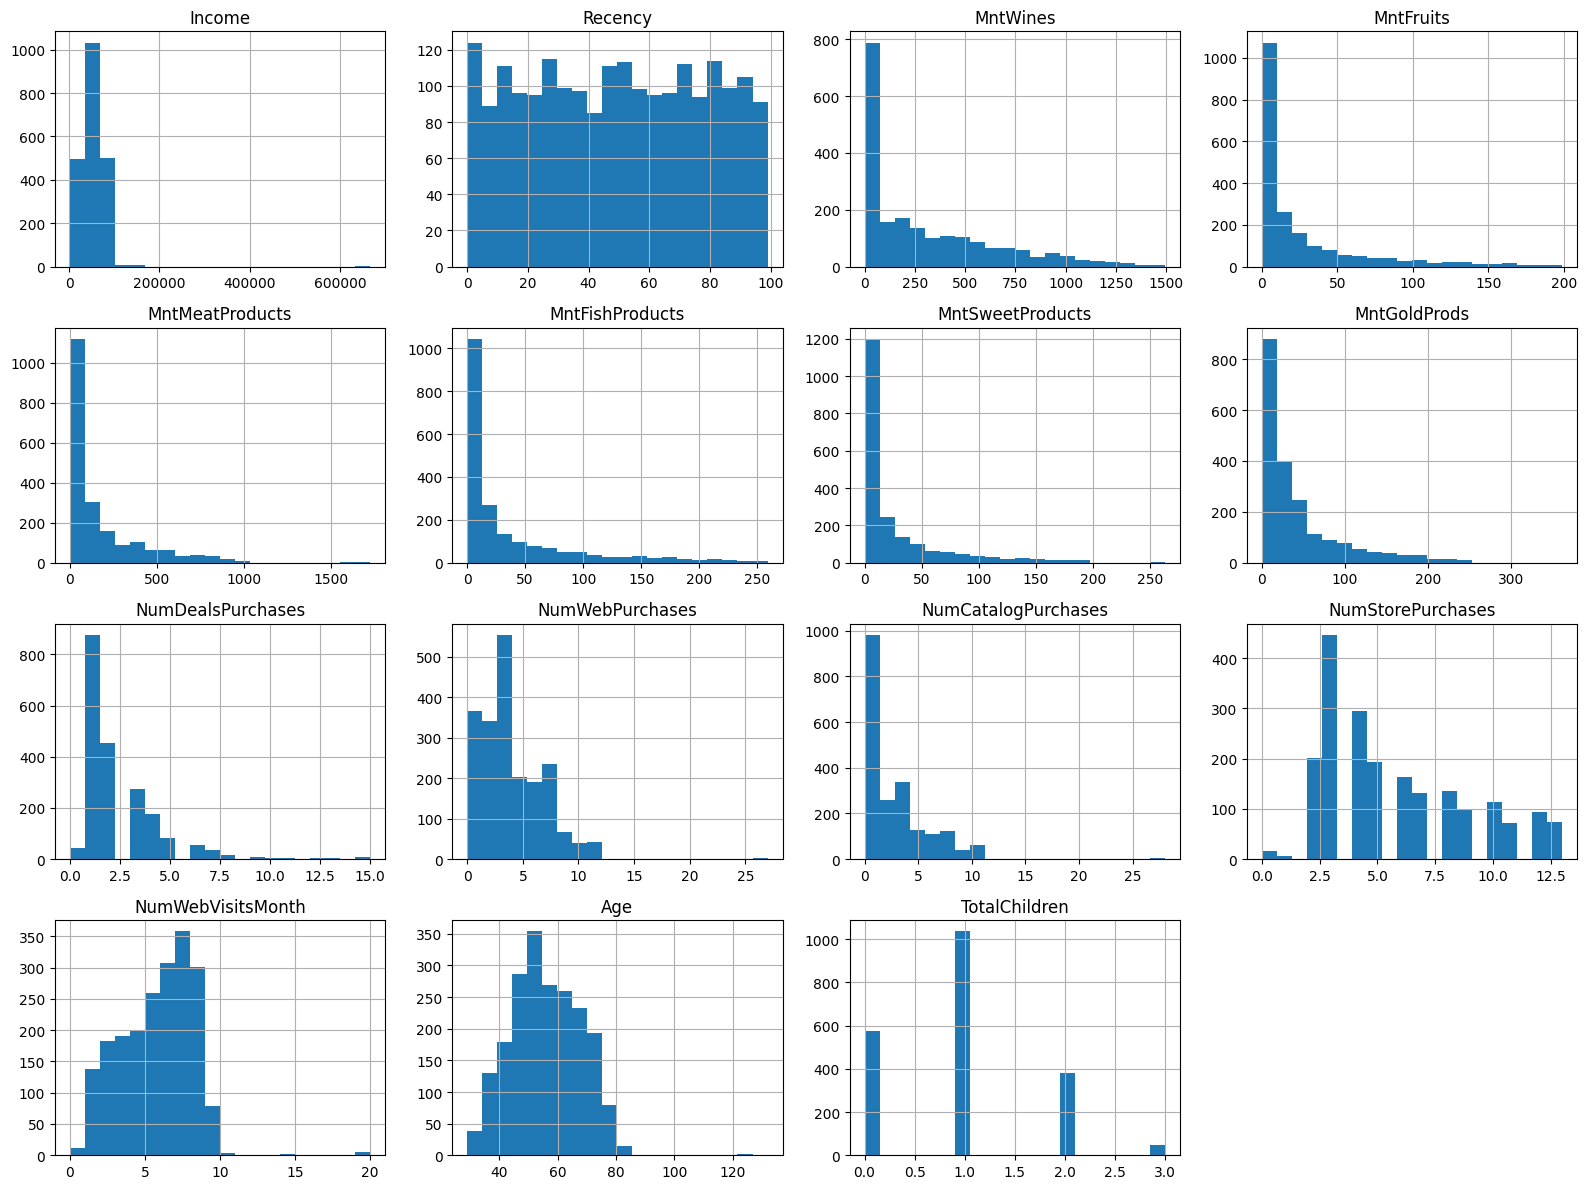

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

df[numeric_cols].hist(bins=20, figsize=(16, 12))
plt.tight_layout()
plt.show()


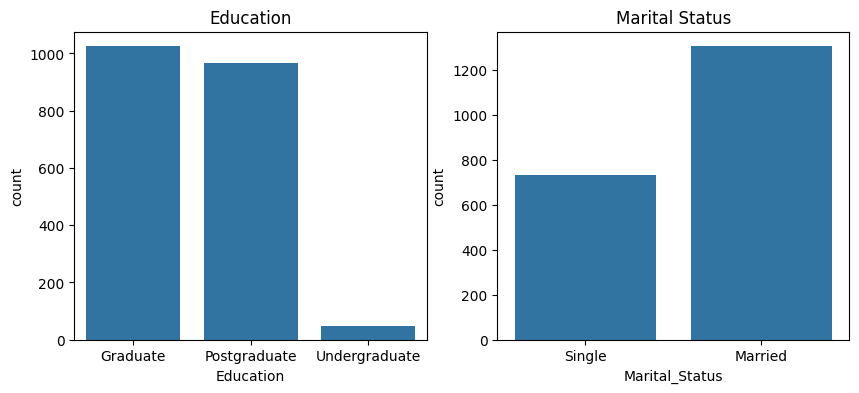

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

sns.countplot(x="Education", data=df, ax=axes[0])
sns.countplot(x="Marital_Status", data=df, ax=axes[1])

axes[0].set_title("Education")
axes[1].set_title("Marital Status")

plt.show()


Xử lý giá trị ngoại lai

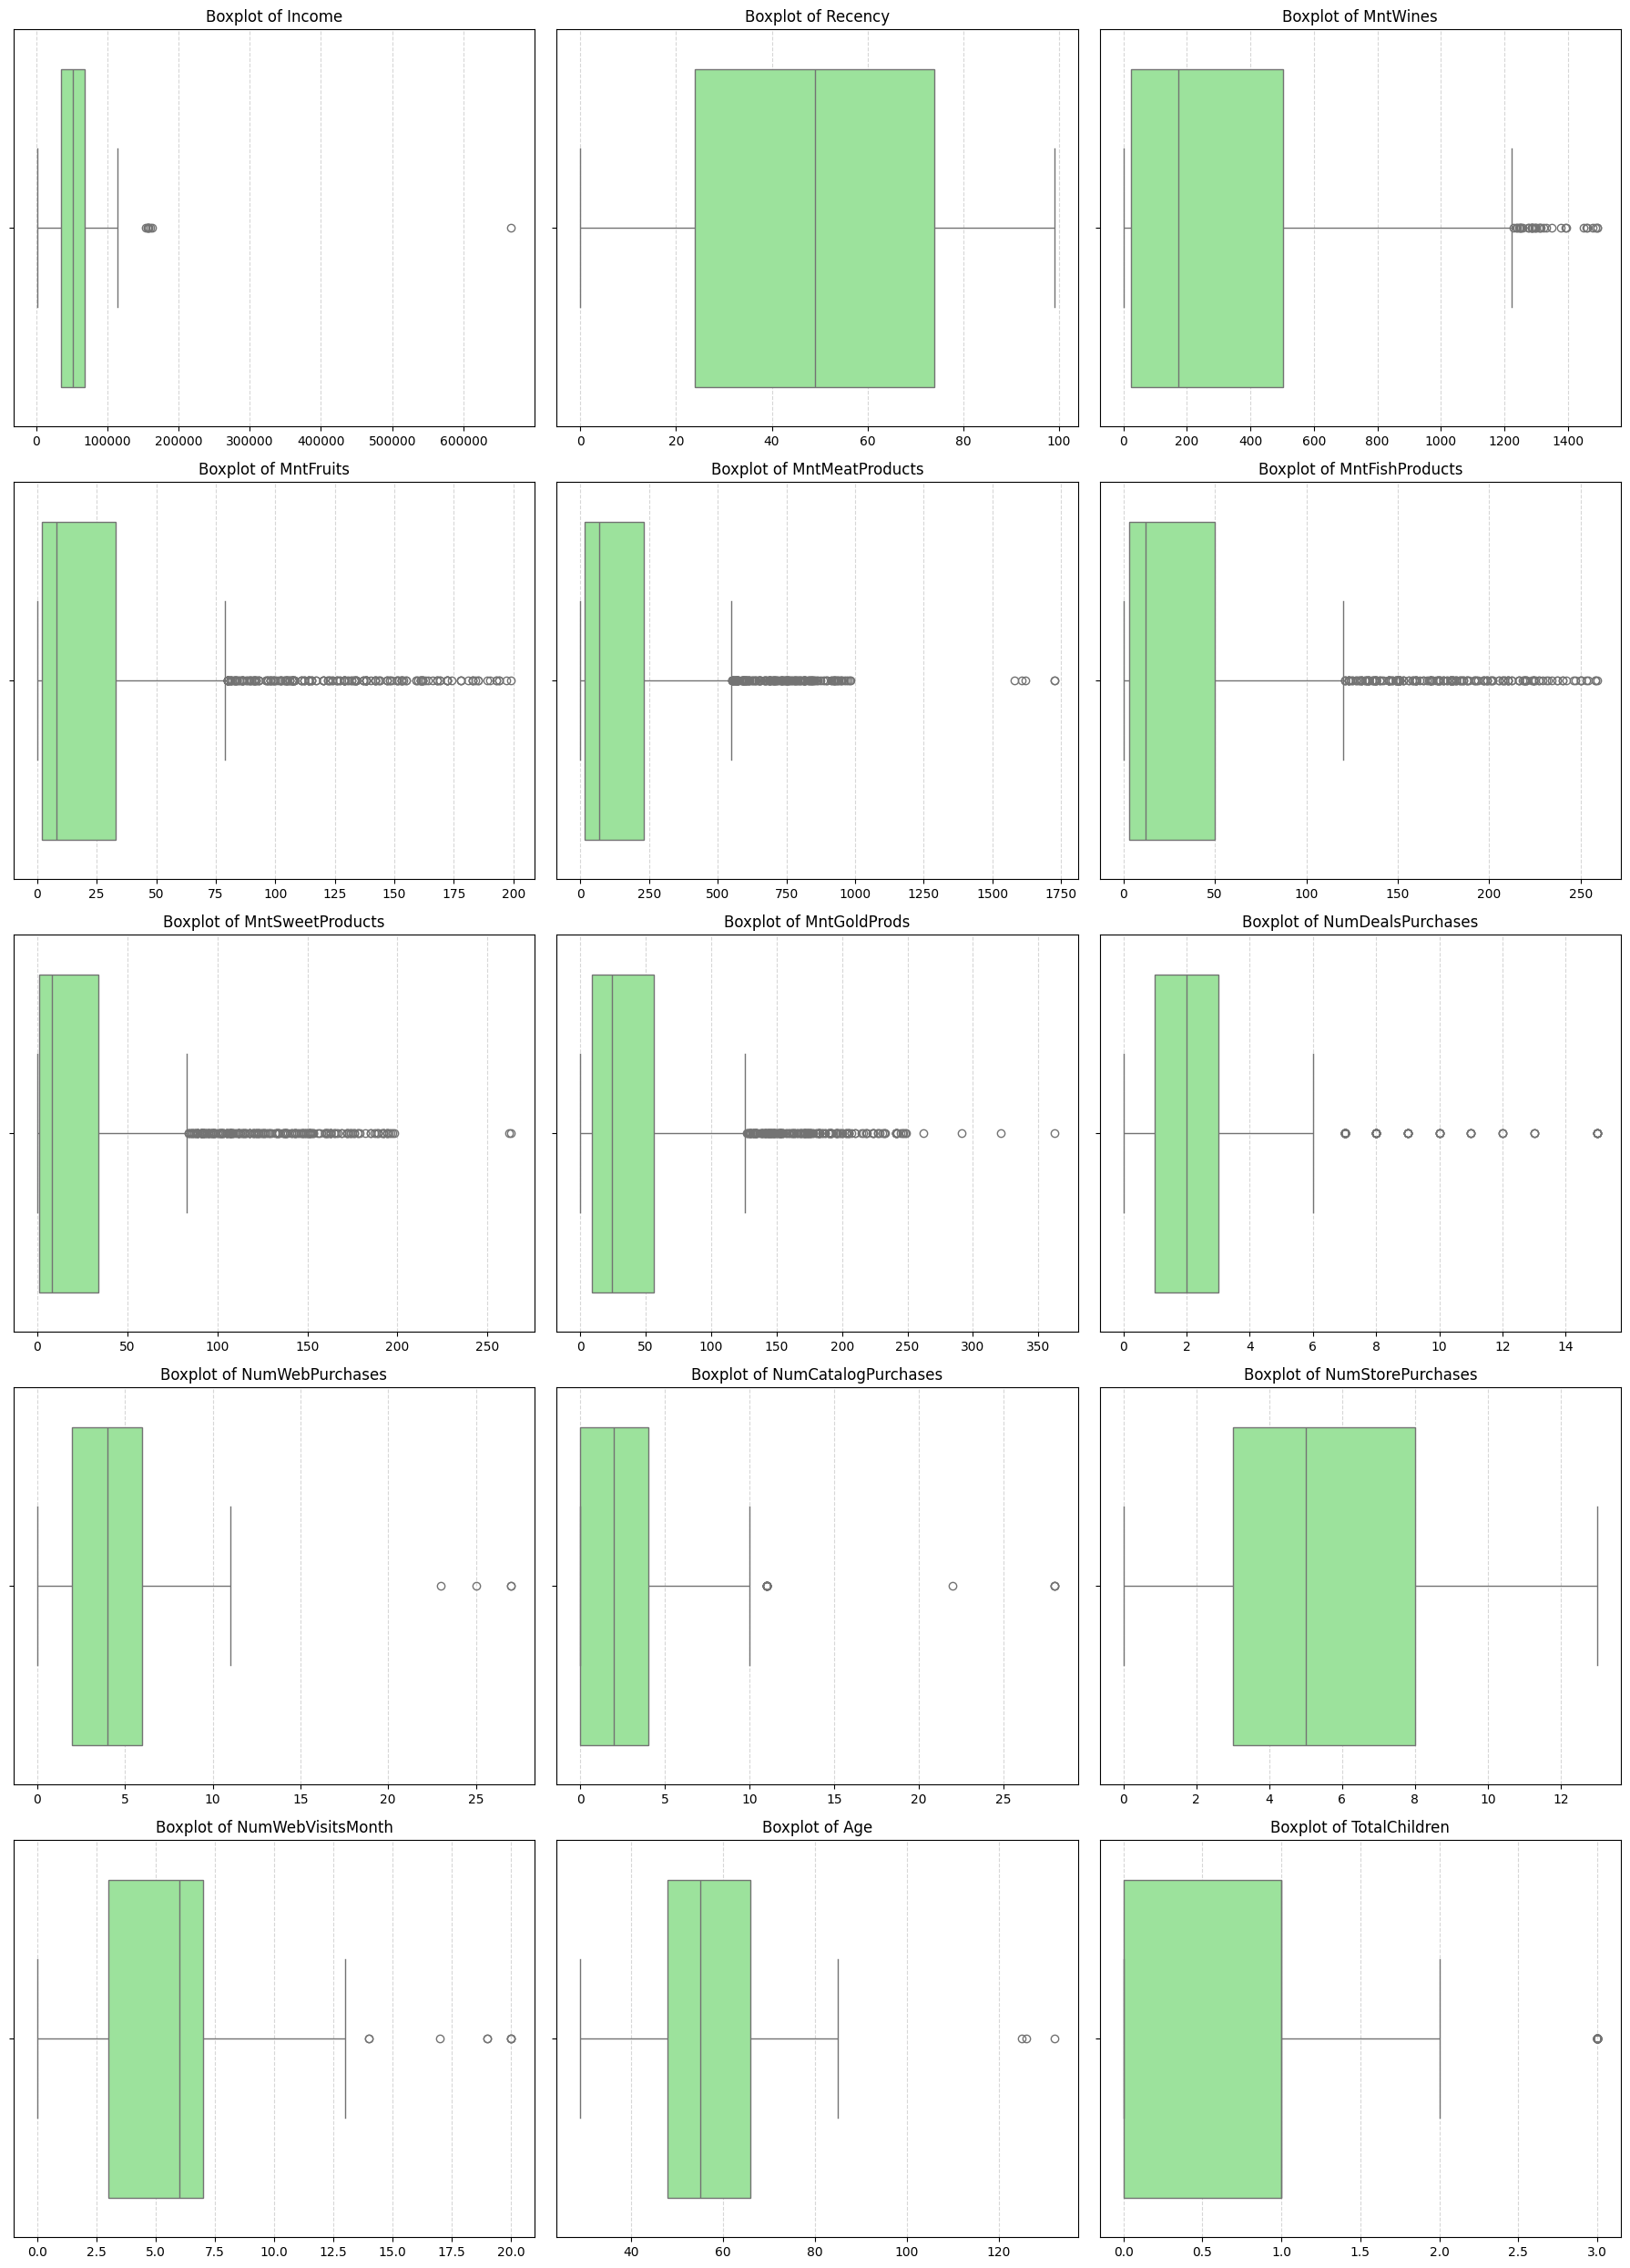

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
#Thiết lập lưới đồ thị (Grid)
n_cols = 3  # Số cột trong lưới
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# Danh sách các cột chặn 2 biên
cols_cap = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts','MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumWebVisitsMonth']

# Hàm chặn 2 biên theo IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

# Áp dụng chặn 2 biên cho các cột
for col in cols_cap:
    df[col] = cap_outliers(df[col])

# Xoá ngoại lai cho Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower) & (df['Age'] <= upper)]


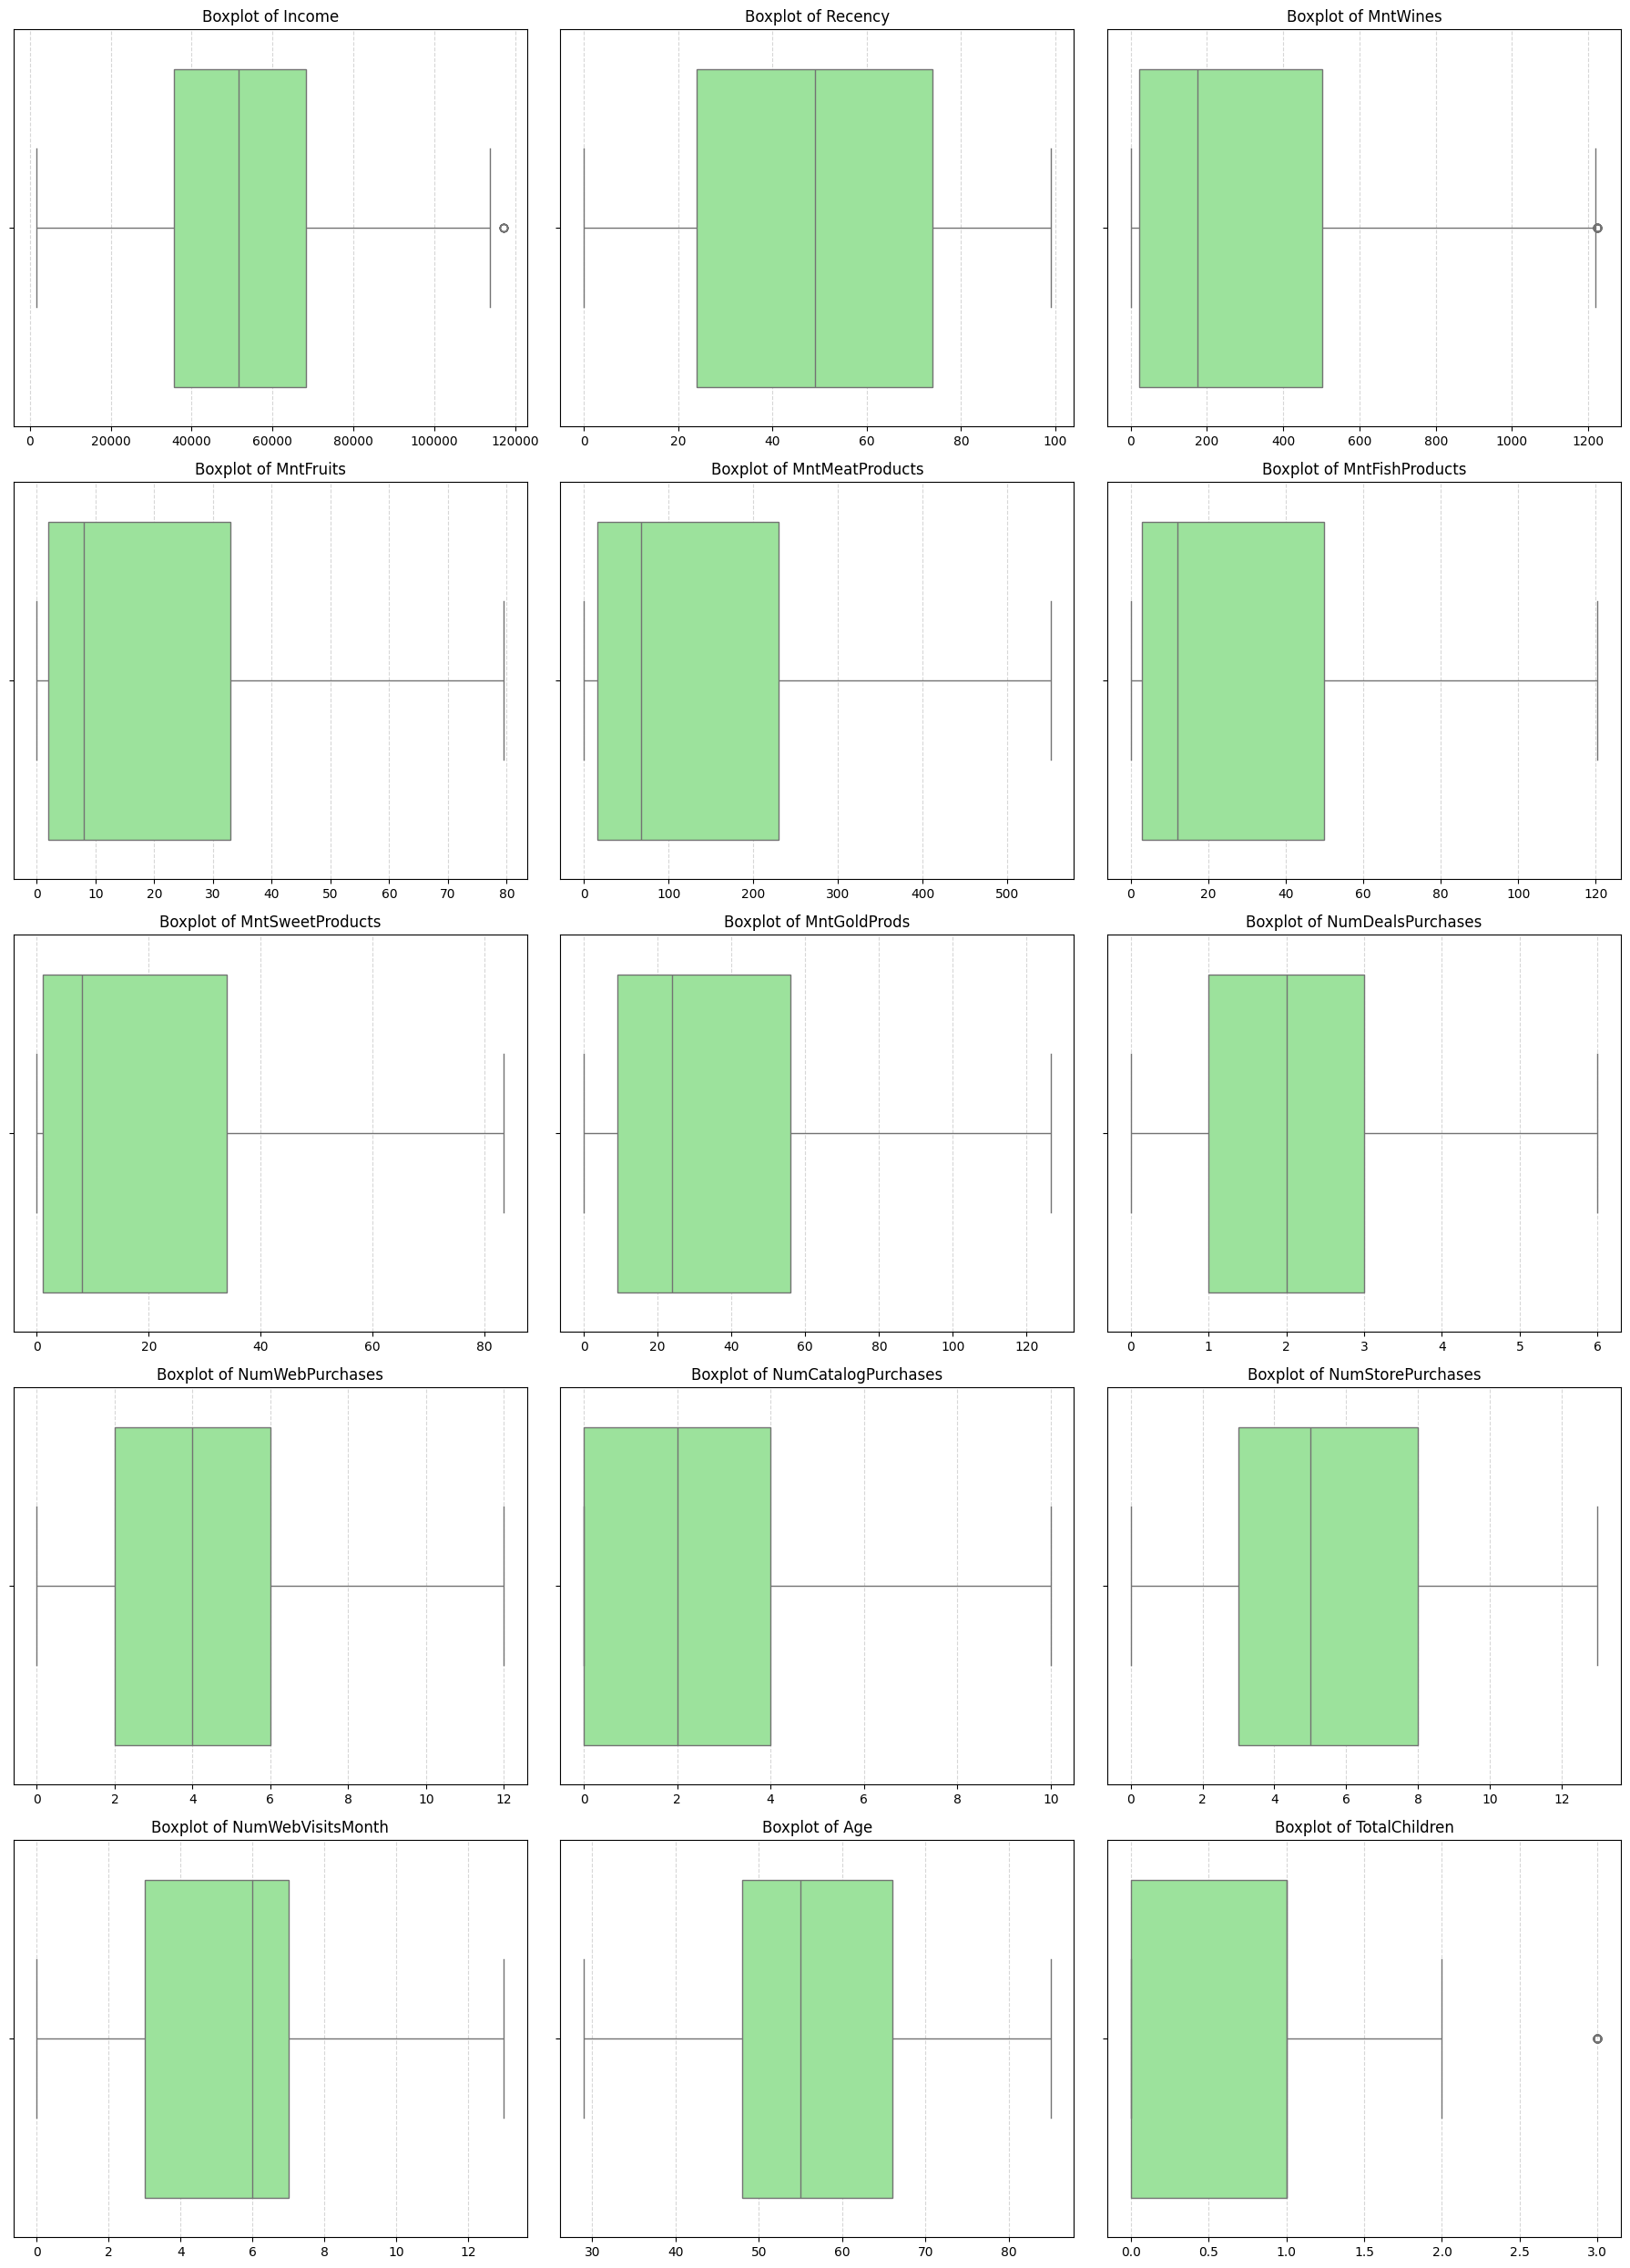

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
#Thiết lập lưới đồ thị (Grid)
n_cols = 3  # Số cột trong lưới
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


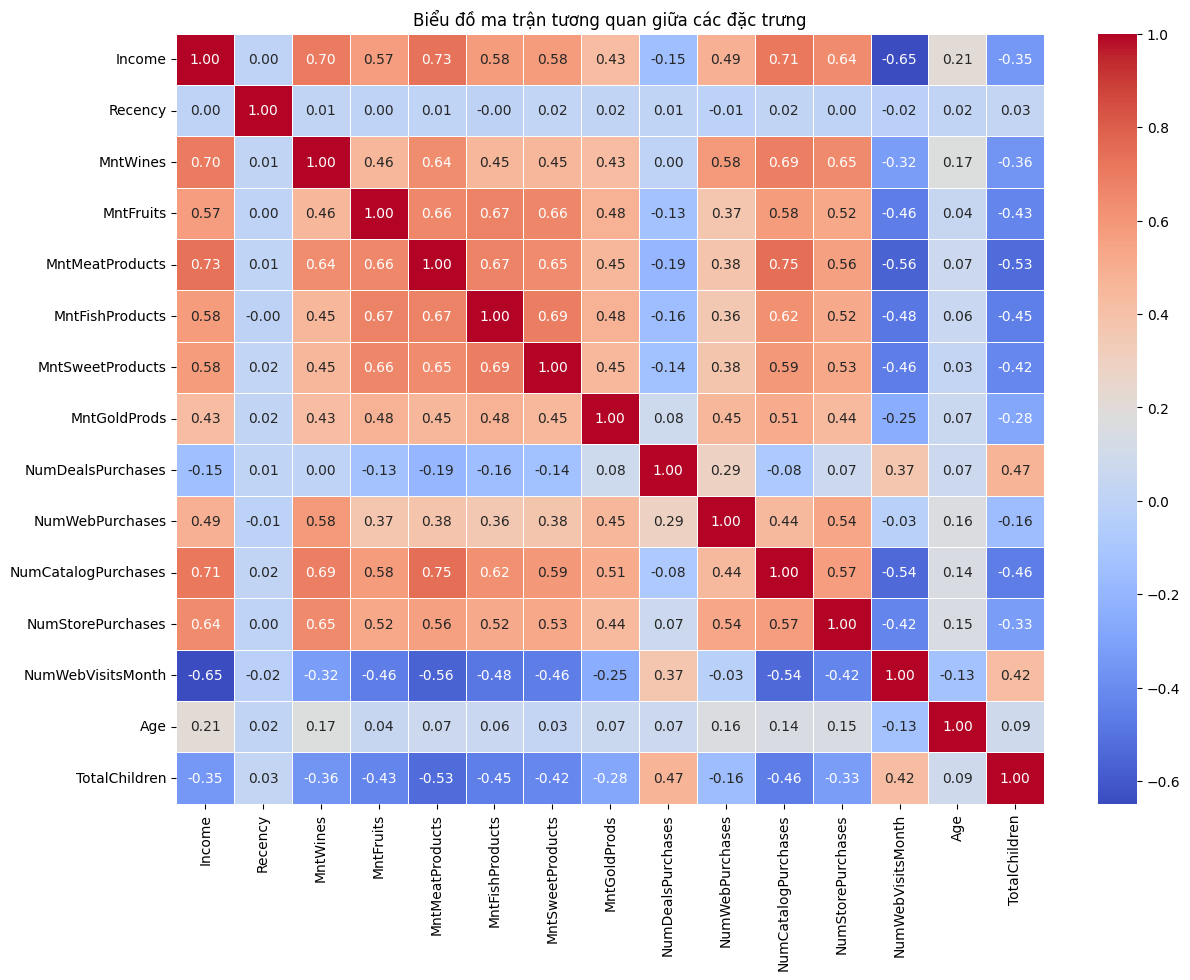

In [ ]:
plt.figure(figsize=(14,10))
numeric_cols = df.select_dtypes(include='number').columns
# Vẽ heatmap ma trận tương quan
sns.heatmap(df[numeric_cols].corr(),annot=True,linewidths=0.5,fmt=".2f",cmap="coolwarm")
plt.title("Biểu đồ ma trận tương quan giữa các đặc trưng")
plt.show()


In [ ]:
df['TotalSpending'] = df[['MntWines','MntFruits','MntMeatProducts',
                           'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
df = df.drop(columns=[
    'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
    'Recency'
])


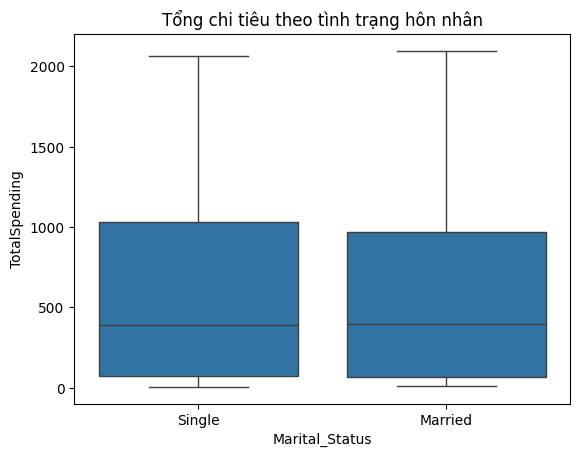

In [ ]:
# Marital Status
sns.boxplot(x='Marital_Status', y='TotalSpending', data=df)
plt.title("Tổng chi tiêu theo tình trạng hôn nhân")
plt.show()


Single và Married có:

* Median (đường giữa hộp) gần như nhau

* Độ phân tán (IQR) tương tự

* Phạm vi chi tiêu tối đa cũng khá giống

Kết luận :
Tình trạng hôn nhân KHÔNG ảnh hưởng rõ rệt đến tổng chi tiêu.
Nếu có khác biệt thì rất nhỏ và khó thấy bằng mắt thường.

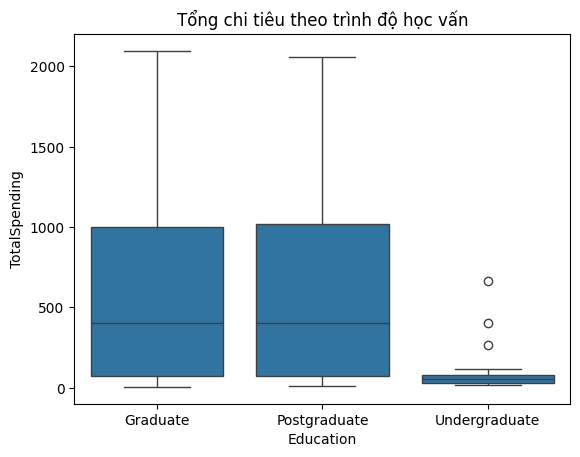

In [ ]:
# Education
sns.boxplot(x='Education', y='TotalSpending', data=df)
plt.title("Tổng chi tiêu theo trình độ học vấn")
plt.show()


Graduate và Postgraduate:

* Median gần giống nhau

* Phân bố chi tiêu khá rộng

Undergraduate:

* Chi tiêu thấp hơn rõ rệt

* Ít giá trị lớn, nhiều điểm tập trung ở mức thấp

* Có vài outlier nhưng không phổ biến

Kết luận:
Trình độ học vấn CÓ ảnh hưởng đến hành vi mua sắm, đặc biệt:

* Nhóm Undergraduate chi tiêu ít hơn

* Nhóm Graduate / Postgraduate chi tiêu cao hơn và đa dạng hơn

In [ ]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'TotalChildren', 'TotalSpending'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
encoded = ohe.fit_transform(df[["Education"]]).toarray()

df_encoded = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(["Education"])
)

df = pd.concat([df.reset_index(drop=True),
                    df_encoded.reset_index(drop=True)], axis=1)



In [ ]:
cols_to_drop = ['Education', 'Marital_Status']
df = df.drop(columns=cols_to_drop, errors='ignore')

Chọn các feature phù hợp

In [ ]:
X=['Income', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'TotalChildren', 'TotalSpending',
       'Education_Postgraduate',
       'Education_Undergraduate']

In [ ]:
data = df[X].copy()


In [ ]:
data

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalChildren,TotalSpending,Education_Postgraduate,Education_Undergraduate
0,58138.0,3,8,10,4,7,0,1552.5,0.0,0.0
1,46344.0,2,1,1,2,5,2,27.0,0.0,0.0
2,71613.0,1,8,2,10,4,0,776.0,0.0,0.0
3,26646.0,2,2,0,4,6,1,53.0,0.0,0.0
4,58293.0,5,5,3,6,5,1,422.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2031,117192.5,4,3,1,3,6,1,62.0,0.0,0.0
2032,61223.0,2,9,3,4,5,1,1186.0,0.0,0.0
2033,56981.0,1,2,3,13,6,0,1241.0,0.0,0.0
2034,69245.0,2,6,5,10,3,1,843.0,1.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2036 non-null   float64
 1   NumDealsPurchases        2036 non-null   int64  
 2   NumWebPurchases          2036 non-null   int64  
 3   NumCatalogPurchases      2036 non-null   int64  
 4   NumStorePurchases        2036 non-null   int64  
 5   NumWebVisitsMonth        2036 non-null   int64  
 6   TotalChildren            2036 non-null   int64  
 7   TotalSpending            2036 non-null   float64
 8   Education_Postgraduate   2036 non-null   float64
 9   Education_Undergraduate  2036 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 159.2 KB


Scale dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)


In [ ]:
X_scaled

array([[ 0.29617804,  0.50829027,  1.47760575, ...,  1.80661617,
        -0.94642324, -0.15703596],
       [-0.26655735, -0.14380739, -1.15738388, ..., -0.9909532 ,
        -0.94642324, -0.15703596],
       [ 0.93912016, -0.79590505,  1.47760575, ...,  0.38261577,
        -0.94642324, -0.15703596],
       ...,
       [ 0.24097329, -0.79590505, -0.78095679, ...,  1.23536552,
        -0.94642324, -0.15703596],
       [ 0.82613412, -0.14380739,  0.72475157, ...,  0.50548509,
         1.05660973, -0.15703596],
       [ 0.04477455,  0.50829027, -0.4045297 , ..., -0.72504198,
         1.05660973, -0.15703596]])

Xây dựng mô hình

In [ ]:
from sklearn.cluster import KMeans

k tốt nhất theo Elbow: 4


/tmp/ipython-input-731781215.py:21: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distance = np.abs(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)


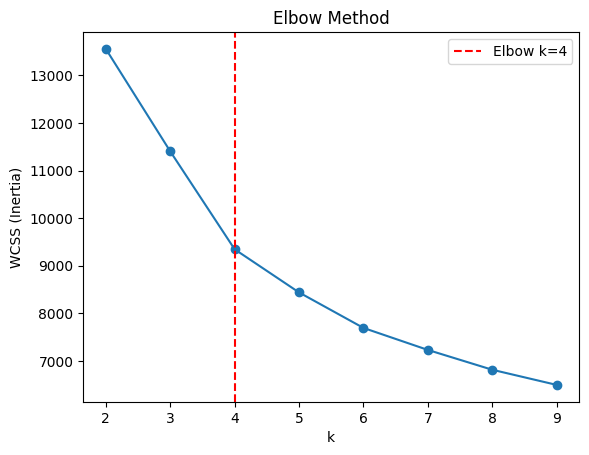

In [ ]:
ks = np.arange(2, 10)
wcss = []

# Tính WCSS
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42,  n_init=20)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

wcss = np.array(wcss)

# ===== TÌM ELBOW =====
# Điểm đầu và cuối
p1 = np.array([ks[0], wcss[0]])
p2 = np.array([ks[-1], wcss[-1]])

# Khoảng cách từ mỗi điểm tới đường thẳng
distances = []
for i in range(len(ks)):
    p = np.array([ks[i], wcss[i]])
    distance = np.abs(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)
    distances.append(distance)

distances = np.array(distances)

best_k = ks[np.argmax(distances)]

print("k tốt nhất theo Elbow:", best_k)

#VẼ BIỂU ĐỒ
plt.plot(ks, wcss, marker="o")
plt.axvline(best_k, linestyle="--", color="red", label=f"Elbow k={best_k}")
plt.xlabel("k")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")
plt.legend()
plt.show()

K=2  Silhouette=0.316
K=3  Silhouette=0.268
K=4  Silhouette=0.300
K=5  Silhouette=0.254
K=6  Silhouette=0.234
K=7  Silhouette=0.238
K=8  Silhouette=0.235
K=9  Silhouette=0.223
K=10  Silhouette=0.223


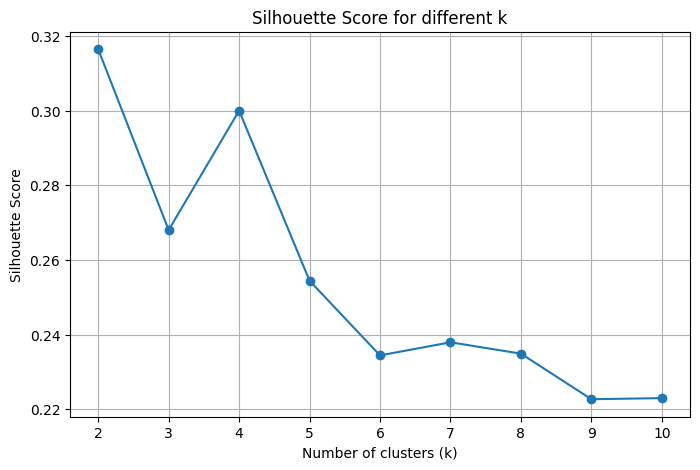

In [ ]:

from sklearn.metrics import silhouette_score

ks = range(2, 11)
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"K={k}  Silhouette={score:.3f}")

# Vẽ biểu đồ Silhouette Score theo k
plt.figure(figsize=(8,5))
plt.plot(ks, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different k")
plt.xticks(ks)
plt.grid(True)
plt.show()

k=2, DBI=1.3087
k=3, DBI=1.4362
k=4, DBI=1.1673
k=5, DBI=1.2806
k=6, DBI=1.4629
k=7, DBI=1.4771
k=8, DBI=1.5248
k=9, DBI=1.4830
k=10, DBI=1.4441


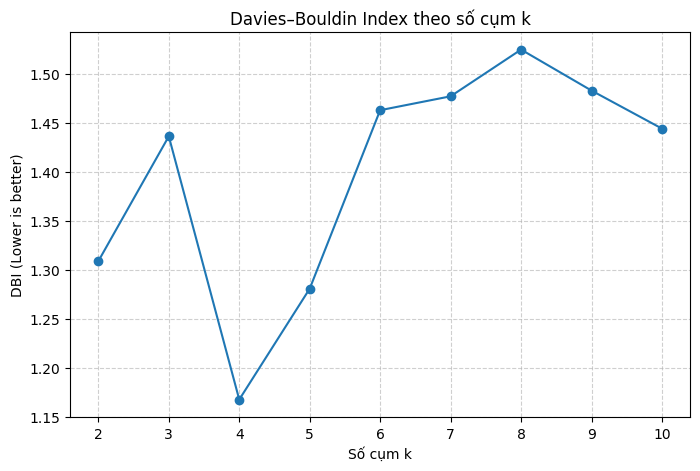

In [ ]:
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

K_range = range(2, 11)   # số cụm từ 2 đến 10
dbi_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    labels = kmeans.fit_predict(X_scaled)  # dữ liệu đã chuẩn hóa

    dbi = davies_bouldin_score(X_scaled, labels)
    dbi_scores.append(dbi)

# In DBI cho từng k
for k, score in zip(K_range, dbi_scores):
    print(f"k={k}, DBI={score:.4f}")

plt.figure(figsize=(8,5))
plt.plot(K_range, dbi_scores, marker='o')
plt.title("Davies–Bouldin Index theo số cụm k")
plt.xlabel("Số cụm k")
plt.ylabel("DBI (Lower is better)")
plt.xticks(K_range)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Tại k=4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

In [ ]:
# Gán nhãn vào DataFrame
data["Cluster"] = labels

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(X_scaled)
data["PCA1"],data["PCA2"]=pca_data[:,0], pca_data[:,1]

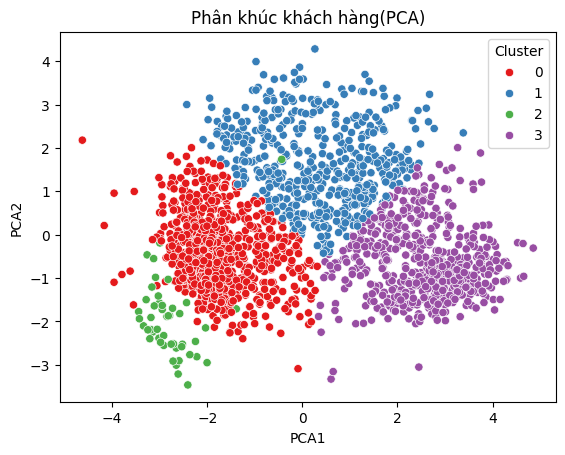

In [ ]:
sns.scatterplot(x="PCA1", y="PCA2",hue="Cluster", data=data, palette="Set1")
plt.title("Phân khúc khách hàng(PCA)")
plt.show()

In [ ]:
data["Cluster"].value_counts()

,count
Cluster,
0,872
3,589
1,526
2,49


In [ ]:
cluster_summary =data.groupby("Cluster")[X].mean()

In [ ]:
cluster_summary

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalChildren,TotalSpending,Education_Postgraduate,Education_Undergraduate
Cluster,,,,,,,,,,
0,35348.694381,1.891055,2.090596,0.545872,3.185780,6.307339,1.247706,95.698394,0.481651,0.0
1,56492.206274,3.937262,6.463878,2.832700,7.501901,6.235741,1.268061,698.950095,0.528517,0.0
2,19913.346939,1.857143,1.918367,0.489796,2.877551,6.918367,0.734694,79.724490,0.000000,1.0
3,75069.584041,1.205433,5.057725,5.670628,8.314092,2.818336,0.252971,1188.701188,0.448217,0.0


Cluster 0 – Khách hàng trung bình

Thu nhập & chi tiêu: Thu nhập trung bình (35.348) , tổng chi tiêu vừa phải (~96)

Hành vi mua sắm: Mua sắm đều nhưng không quá nhiều trên các kênh Web, Store, Catalog; số lần truy cập Web trung bình

Đặc điểm cá nhân: Số con trung bình ~1,25; trình độ Postgraduate ~48%, không có Undergraduate

Hành vi mua sắm: Quyết định mua vừa phải, chi tiêu không lớn, ít nhạy cảm với giá

Chiến lược đề xuất:

Tăng cường khuyến mãi định kỳ

Tư vấn sản phẩm phù hợp nhu cầu

Marketing đa kênh (Web + Store)

Cluster 1 – Khách hàng giá trị cao

Thu nhập & chi tiêu: Thu nhập cao (56.492), tổng chi tiêu lớn (~699) → nhóm mang lại doanh thu chính

Hành vi mua sắm: Mua đều ở mọi kênh, mua nhiều tại Store; số lần truy cập Web trung bình nhưng giá trị mỗi đơn hàng cao

Đặc điểm cá nhân: Số con trung bình ~1,27; Postgraduate ~53%, không có Undergraduate

Hành vi mua sắm: Ít phụ thuộc khuyến mãi, quyết định mua nhanh, giá trị đơn hàng lớn

Chiến lược đề xuất:

Chăm sóc khách hàng VIP

Ưu đãi cá nhân hóa

Tập trung sản phẩm cao cấp và dịch vụ hậu mãi

Cluster 2 – Khách hàng ít giá trị

Thu nhập & chi tiêu: Thu nhập thấp (19.913), tổng chi tiêu thấp (~80)

Hành vi mua sắm: Mua ít trên tất cả các kênh, số lần truy cập Web cao nhưng mua ít

Đặc điểm cá nhân: Số con trung bình ~0,73; tất cả là Undergraduate

Hành vi mua sắm: Nhạy cảm về giá, thường so sánh trước khi mua, trung thành thấp

Chiến lược đề xuất:

Khuyến mãi nhỏ, tập trung sản phẩm giá thấp

Marketing trực tuyến, email nhắc nhở

Tạo các combo tiết kiệm để kích thích mua sắm

Cluster 3 – Khách hàng VIP cao cấp

Thu nhập & chi tiêu: Thu nhập rất cao (75.070), tổng chi tiêu cực lớn (~1.189)

Hành vi mua sắm: Mua nhiều trên Web, Store, Catalog, ít mua Deal; số lần truy cập Web thấp nhưng giá trị mỗi đơn hàng cực cao

Đặc điểm cá nhân: Số con trung bình rất thấp (~0,25); Postgraduate ~45%, không có Undergraduate

Hành vi mua sắm: Quyết định mua nhanh, chi tiêu cực lớn, ít phụ thuộc khuyến mãi

Chiến lược đề xuất:

Chăm sóc đặc biệt VIP

Ưu đãi độc quyền, dịch vụ cao cấp

Tập trung vào trải nghiệm khách hàng và sản phẩm hạng sang

In [ ]:
import joblib
joblib.dump(kmeans, "/content/drive/MyDrive/BTL_AI/kmeans_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/BTL_AI/scaler.pkl")

['/content/drive/MyDrive/BTL_AI/scaler.pkl']

In [ ]:
joblib.dump(cluster_summary , "/content/drive/MyDrive/BTL_AI/cluster_profile==.pkl")

['/content/drive/MyDrive/BTL_AI/cluster_profile.pkl']

Tại k=2

In [ ]:
kmeans=KMeans(n_clusters=2,random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

In [ ]:
# Gán nhãn vào DataFrame
data["Cluster"] = labels

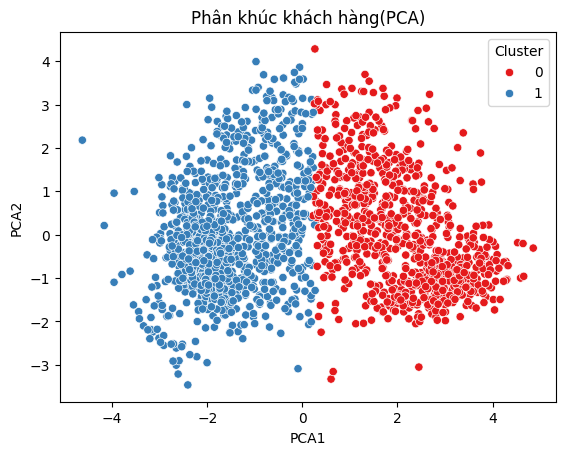

In [ ]:
sns.scatterplot(x="PCA1", y="PCA2",hue="Cluster", data=data, palette="Set1")
plt.title("Phân khúc khách hàng(PCA)")
plt.show()

In [ ]:
cluster_summary1 =data.groupby("Cluster")[X].mean()

In [ ]:
data["Cluster"].value_counts()

,count
Cluster,
1,1156
0,880


In [ ]:
cluster_summary1

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalChildren,TotalSpending,Education_Postgraduate,Education_Undergraduate
Cluster,,,,,,,,,,
0,70916.748864,1.932955,5.684091,4.996591,8.498864,3.746591,0.535227,1094.067898,0.477273,0.000000
1,37477.475779,2.439446,2.849481,0.807093,3.705017,6.472318,1.270761,166.408737,0.468858,0.042388


# Cluster 0 – Khách hàng giá trị cao

Thu nhập cao (khoảng 70,900)

Tổng chi tiêu rất lớn (khoảng 1,094), là nhóm mang lại doanh thu chính

Mua sắm chủ yếu tại cửa hàng, số lần mua tại cửa hàng cao

Mua qua web và catalog cũng ở mức cao

Số lần truy cập web thấp nhưng giá trị mỗi lần mua lớn

Số con trung bình thấp

Tỷ lệ khách hàng có trình độ Postgraduate cao, không có Undergraduate

Hành vi mua sắm

* Ít phụ thuộc khuyến mãi

* Quyết định mua nhanh

* Giá trị đơn hàng cao

Chiến lược đề xuất

* Chăm sóc khách hàng VIP

* Ưu đãi cá nhân hóa

* Tập trung sản phẩm cao cấp và dịch vụ hậu mãi

# Cluster 1 – Khách hàng nhạy cảm về giá

Thu nhập thấp hơn (khoảng 37,500)

Tổng chi tiêu thấp (khoảng 166)

Số con trung bình cao hơn

Số lần mua khi có khuyến mãi cao

Truy cập website nhiều nhưng tỷ lệ mua thấp

Mua sắm chủ yếu qua kênh online, rất ít qua catalog

Có một tỷ lệ nhỏ khách hàng Undergraduate

Hành vi mua sắm

* Thường xuyên so sánh giá

* Ưu tiên sản phẩm giá thấp

* Mức độ trung thành chưa cao

Chiến lược đề xuất

* Áp dụng khuyến mãi thường xuyên

* Bán theo combo tiết kiệm

* Đẩy mạnh email marketing và remarketing

In [ ]:
import joblib
joblib.dump(kmeans, "/content/drive/MyDrive/BTL_AI/kmeans_model1.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/BTL_AI/scaler1.pkl")

['/content/drive/MyDrive/BTL_AI/scaler1.pkl']

In [ ]:
joblib.dump(cluster_summary1 , "/content/drive/MyDrive/BTL_AI/cluster_profile1.pkl")

['/content/drive/MyDrive/BTL_AI/cluster_profile1.pkl']